In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import warnings
from sklearn.metrics import accuracy_score
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

#####READS THE MONTHLY SALES DATA CSV FILE
sales = pd.read_csv('./data_csv/monthly-sales-data-final.csv')

#####SET MONTH AS INDEX FOR DECOMPOSITION AND SPLIT SALES DATA INTO 3 REGION SPECIFIC DATASETS
emea_sales_actuals = sales.loc[sales['region'] == 'EMEA'].set_index('month')
america_sales_actuals = sales.loc[sales['region'] == 'AMERICA'].set_index('month')
asia_sales_actuals = sales.loc[sales['region'] == 'ASIA'].set_index('month')

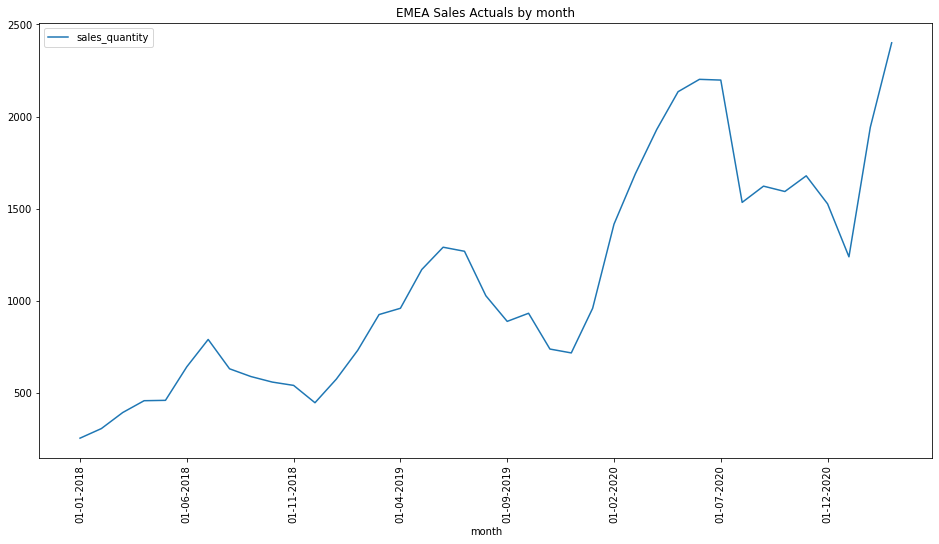

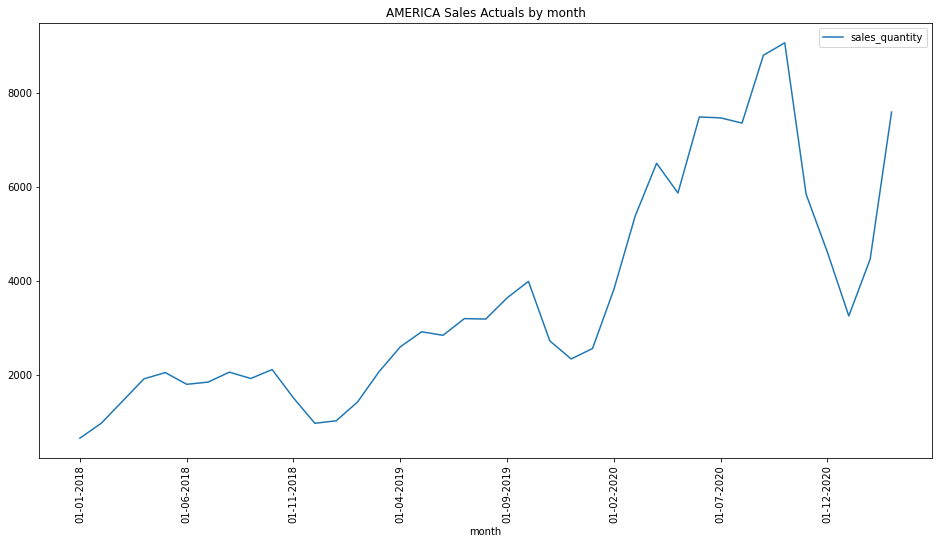

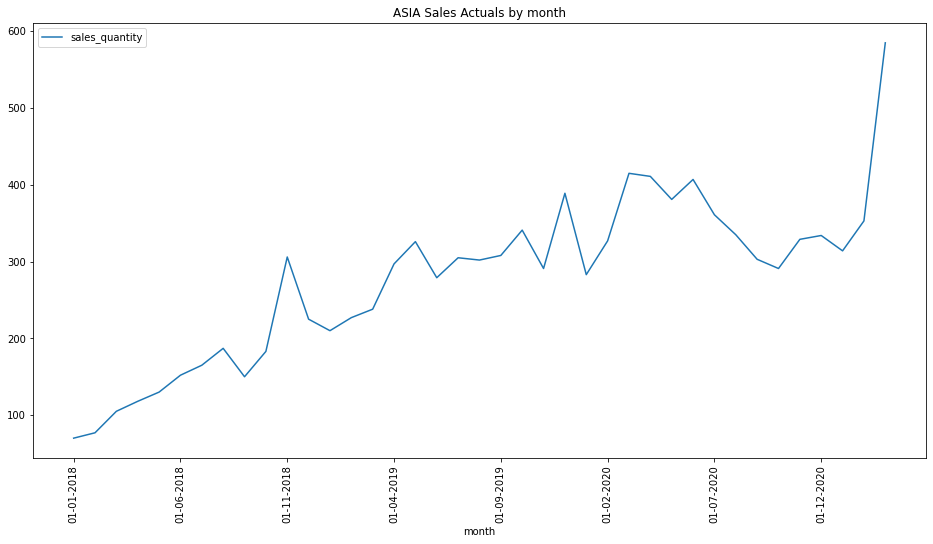

In [2]:
#####PLOT THE TIME SERIES OF SALES DATA
emea_sales_actuals.plot(figsize=(16, 8), title='EMEA Sales Actuals by month')
plt.xticks(rotation=90)
plt.legend()
plt.show()

america_sales_actuals.plot(figsize=(16, 8), title = 'AMERICA Sales Actuals by month')
plt.xticks(rotation=90)
plt.show()

asia_sales_actuals.plot(figsize=(16, 8), title = 'ASIA Sales Actuals by month')
plt.xticks(rotation=90)
plt.show()

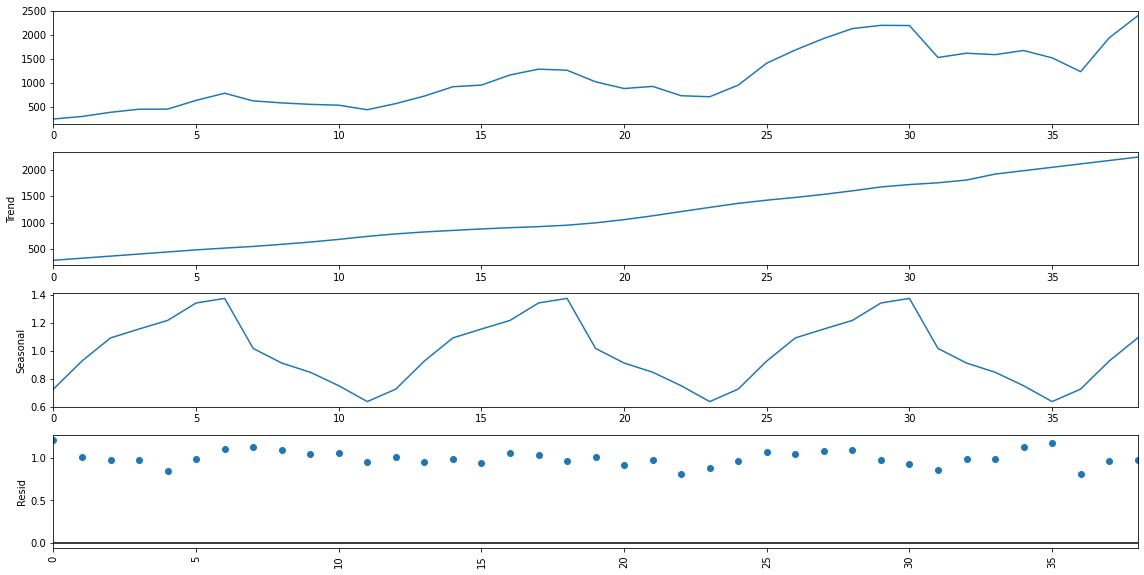

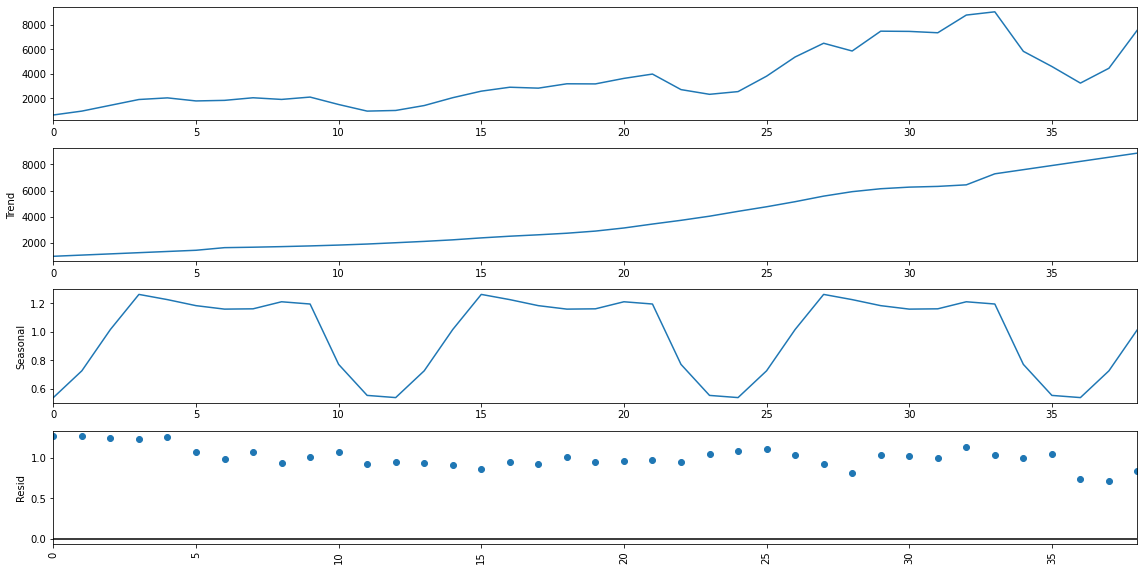

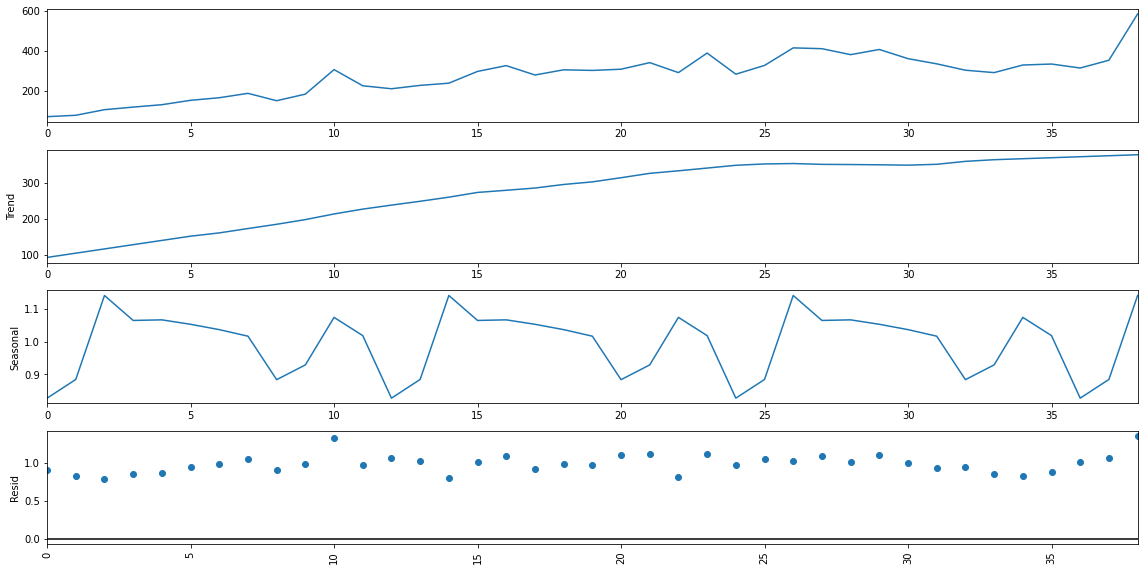

In [3]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 8

#####STORE SALES VALUES INTO NEW SERIES FOR DECOMPOSITION

emea_sales = (emea_sales_actuals['sales_quantity']).reset_index().drop(columns=['month'])
america_sales = (america_sales_actuals['sales_quantity']).reset_index().drop(columns=['month'])
asia_sales = (asia_sales_actuals['sales_quantity']).reset_index().drop(columns=['month'])


EMEA_decomposition = sm.tsa.seasonal_decompose(emea_sales, model='multiplicative', period=12, extrapolate_trend='freq')
fig = EMEA_decomposition.plot()
plt.xticks(rotation=90)
plt.show()


AMERICA_decomposition = sm.tsa.seasonal_decompose(america_sales, model='multiplicative', period=12, extrapolate_trend='freq')
fig = AMERICA_decomposition.plot()
plt.xticks(rotation=90)
plt.show()

ASIA_decomposition = sm.tsa.seasonal_decompose(asia_sales, model='multiplicative', period=12, extrapolate_trend='freq')
fig = ASIA_decomposition.plot()
plt.xticks(rotation=90)
plt.show()



In [4]:
import itertools

#####CRATING PARAMETERS LIST FOR THE SARIMAX MODEL
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [5]:
#Selecting the model using the Akaike information criteria (AIC),
#below it runs running the model for each variant. The model with lowest AIC value will be selected.
#Used option enforce_invertibility=False, which allows the moving average polynomial to be non-invertible, so that more of the models are estimable.

#print('START OF EMEA Sales Akaike Information criteria')
#
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(emea_sales,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=True,
#                                            enforce_invertibility=True)
#            results = mod.fit()
#            print('EMEA Sales ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue
#
#
#print('START OF AMERICA Sales Akaike Information criteria')
#
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(america_sales,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=True,
#                                            enforce_invertibility=True)
#            results = mod.fit()
#            print('AMERICA Sales ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue
#
#
#print('START OF ASIA Sales Akaike Information criteria')
#
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(asia_sales,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=True,
#                                            enforce_invertibility=True)
#            results = mod.fit()
#            print('ASIA Sales ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue

In [20]:
#####ONCE THE CORRECT VALUE FOR THE p,d,q PARAMETERS ARE IDENTIFIED, WE CAN START RUNNING THE PREDICTIVE MODEL
##EMEA - 1,1,0 - 1,1,1,12
mod = sm.tsa.statespace.SARIMAX(emea_sales,
                                order=(1,1,0),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
EMEA_SARIMAX_results = mod.fit()
print(EMEA_SARIMAX_results.summary().tables[1])

#AMERICA - 1,1,0 - 2,1,1,12
mod = sm.tsa.statespace.SARIMAX(america_sales,
                                order=(1,1,0),
                                seasonal_order=(2,1,1,12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
AMERICA_SARIMAX_results = mod.fit()
print(AMERICA_SARIMAX_results.summary().tables[1])

#ASIA T 1,1,0 - 1,1,1, 12
mod = sm.tsa.statespace.SARIMAX(asia_sales,
                                order=(1,1,0),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
ASIA_SARIMAX_results = mod.fit()
print(ASIA_SARIMAX_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1417      0.276     -0.513      0.608      -0.683       0.399
ar.S.L12       0.9948      0.130      7.626      0.000       0.739       1.251
ma.S.L12      -0.9663      0.467     -2.067      0.039      -1.882      -0.050
sigma2      3.561e+04   2.05e-05   1.74e+09      0.000    3.56e+04    3.56e+04
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1044      0.240      0.435      0.663      -0.366       0.574
ar.S.L12       1.2655      2.588      0.489      0.625      -3.808       6.339
ar.S.L24      -0.2694      2.290     -0.118      0.906      -4.757       4.218
ma.S.L12      -0.9556      2.116     -0.452      0.652      -5.102       3.191
sigma2      5.322e+05   8.86e-06   6.01e+10      0.0

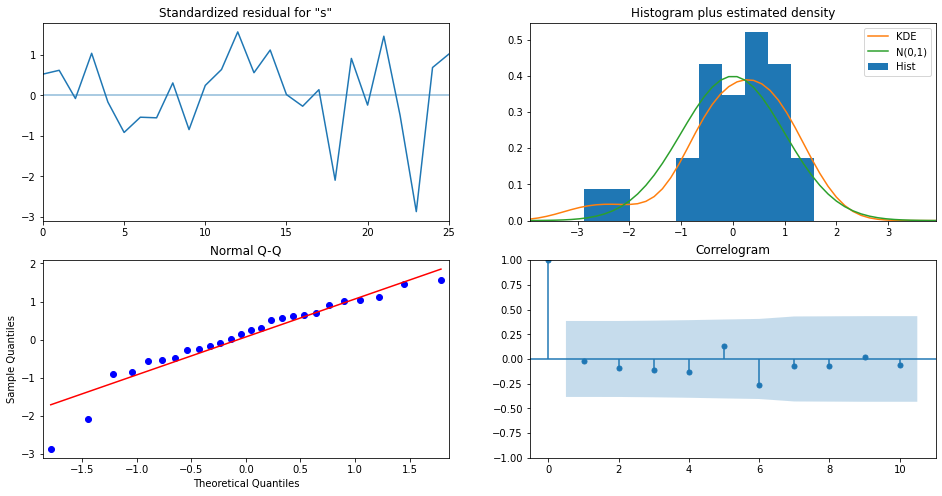

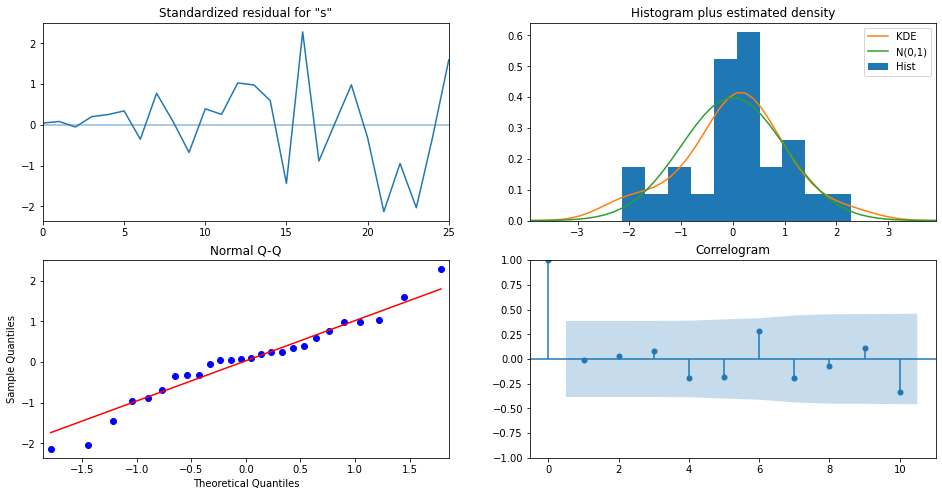

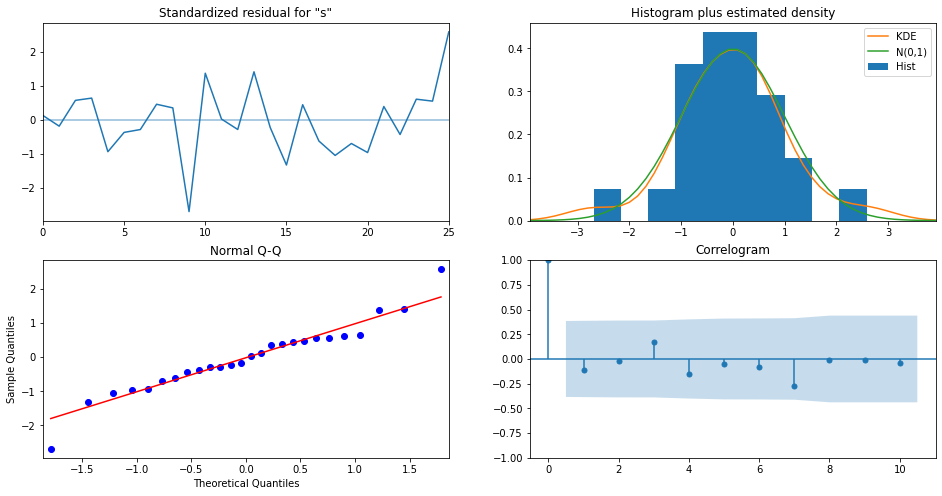

In [33]:
#####HERE WE PRINT THE DIAGNOSTICS OF THE MODELS
EMEA_Diagnostics = EMEA_SARIMAX_results.plot_diagnostics(figsize=(16, 8))
plt.show()

AMERICA_Diagnostics = AMERICA_SARIMAX_results.plot_diagnostics(figsize=(16, 8))
plt.show()

ASIA_Diagnostics = ASIA_SARIMAX_results.plot_diagnostics(figsize=(16, 8))
plt.show()

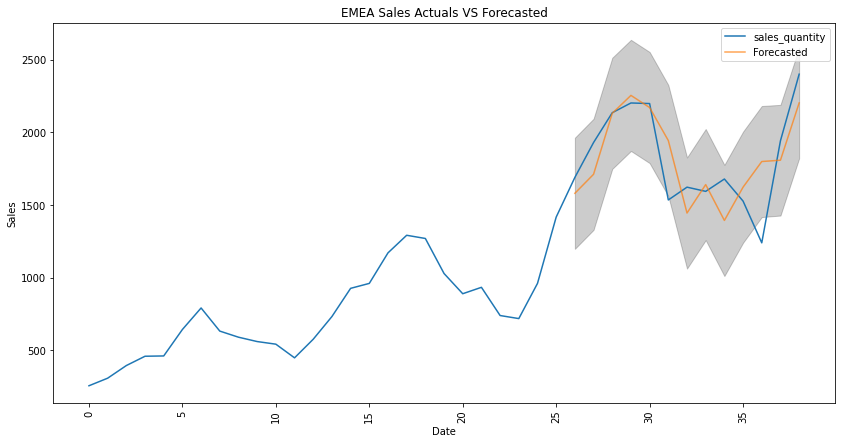

In [22]:
#####WE START BACKTESTING PREDICTION OF  THE EMEA SALES QUANTITY FOR THE LAST 12 MONTHS (FROM Q2 2020 to End of Q1 2021)
##### TEST SET = 33.3%
#####TRAINGING SET = 66.6%

EMEA_pred =[]
EMEA_pred = EMEA_SARIMAX_results.get_prediction(start=(emea_sales).index[26], dynamic=False)

EMEA_pred_ci = EMEA_pred.conf_int()
ax = emea_sales.plot(label='Observed', title='EMEA Sales Actuals VS Forecasted')
EMEA_pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.fill_between(EMEA_pred_ci.index,
                EMEA_pred_ci.iloc[:, 0],
                EMEA_pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
ax.plot()
plt.xticks(rotation=90)
#saving the backtesting as a png file
plt.savefig('EMEA_Sales_SARIMAX.png')



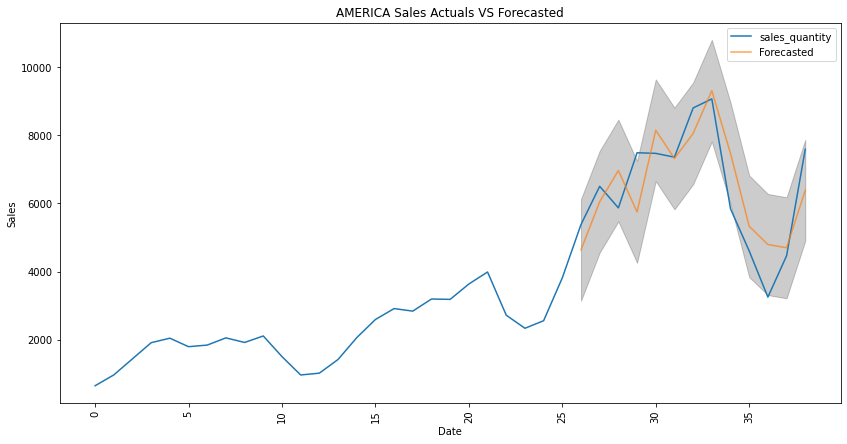

In [23]:
#####WE START BACKTESTING PREDICTION OF  THE AMERICA SALES QUANTITY FOR THE LAST 12 MONTHS (FROM Q2 2020 to End of Q1 2021)
##### TEST SET = 33.3%
#####TRAINGING SET = 66.6%

AMERICA_pred =[]
AMERICA_pred = AMERICA_SARIMAX_results.get_prediction(start=america_sales.index[26], dynamic=False)

AMERICA_pred_ci = AMERICA_pred.conf_int()
ax = america_sales.plot(label='Observed', title='AMERICA Sales Actuals VS Forecasted')
AMERICA_pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.fill_between(AMERICA_pred_ci.index,
                AMERICA_pred_ci.iloc[:, 0],
                AMERICA_pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
ax.plot()
plt.xticks(rotation=90)
#saving the backtesting as a png file
plt.savefig('AMERICA_Sales_SARIMAX.png')

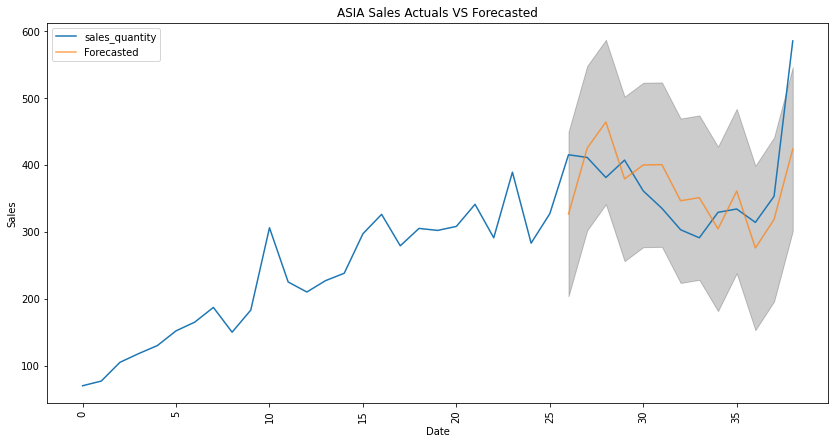

In [24]:


#####WE START BACKTESTING PREDICTION OF  THE ASIA SALES QUANTITY FOR THE LAST 12 MONTHS (FROM Q2 2020 to End of Q1 2021)
##### TEST SET = 33.3%
#####TRAINGING SET = 66.6%
ASIA_pred =[]
ASIA_pred = ASIA_SARIMAX_results.get_prediction(start=asia_sales.index[26], dynamic=False)

ASIA_pred_ci = ASIA_pred.conf_int()
ax = asia_sales.plot(label='Observed', title='ASIA Sales Actuals VS Forecasted')
ASIA_pred.predicted_mean.plot(ax=ax, label='Forecasted', alpha=.7, figsize=(14, 7))
ax.fill_between(ASIA_pred_ci.index,
                ASIA_pred_ci.iloc[:, 0],
                ASIA_pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()
ax.plot()
plt.xticks(rotation=90)
#saving the backtesting as a png file
plt.savefig('ASIA_Sales_SARIMAX.png')

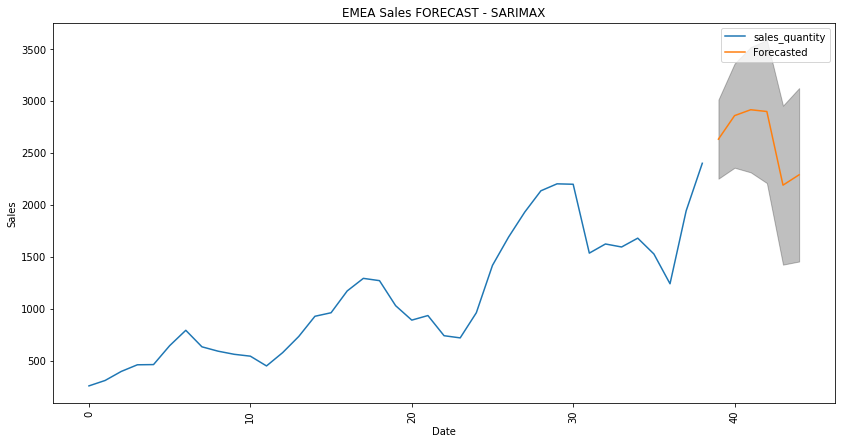

<Figure size 1152x576 with 0 Axes>

In [25]:
#####FORECAST OF NEXT 6 Months EMEA Sales (steps=6)
EMEA_pred_uc = EMEA_SARIMAX_results.get_forecast(steps=6)
EMEA_pred_ci = EMEA_pred_uc.conf_int()
ax = emea_sales.plot(title='EMEA Sales FORECAST - SARIMAX',  label='Observed', figsize=(14, 7))
EMEA_pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(EMEA_pred_ci.index,
                EMEA_pred_ci.iloc[:, 0],
                EMEA_pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.xticks(rotation=90)
plt.show()
#saving the prediction as a png file
plt.savefig('EMEA_FORECAST_SARIMAX.png')


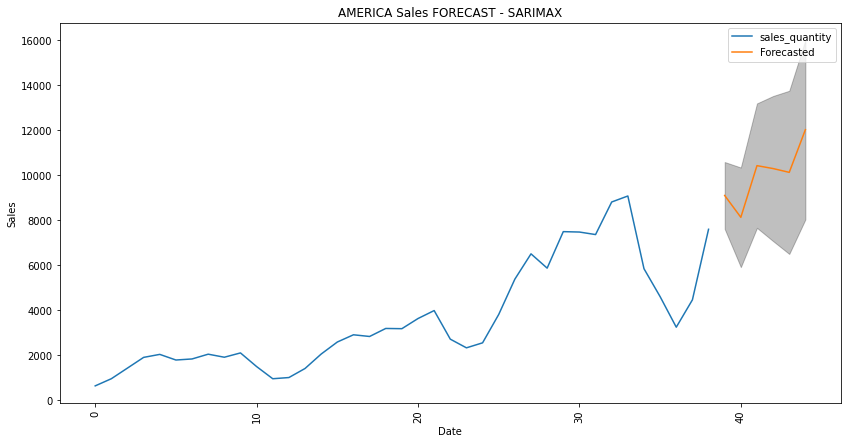

In [26]:
#####FORECAST OF NEXT 6 Months AMERICA Sales (steps=6)
AMERICA_pred_uc = AMERICA_SARIMAX_results.get_forecast(steps=6)
AMERICA_pred_ci = AMERICA_pred_uc.conf_int()
ax = america_sales.plot(title='AMERICA Sales FORECAST - SARIMAX', label='Observed', figsize=(14, 7))
AMERICA_pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(AMERICA_pred_ci.index,
                AMERICA_pred_ci.iloc[:, 0],
                AMERICA_pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.xticks(rotation=90)
#saving the prediction as a png file
plt.savefig('AMERICA_FORECAST_SARIMAX.png')

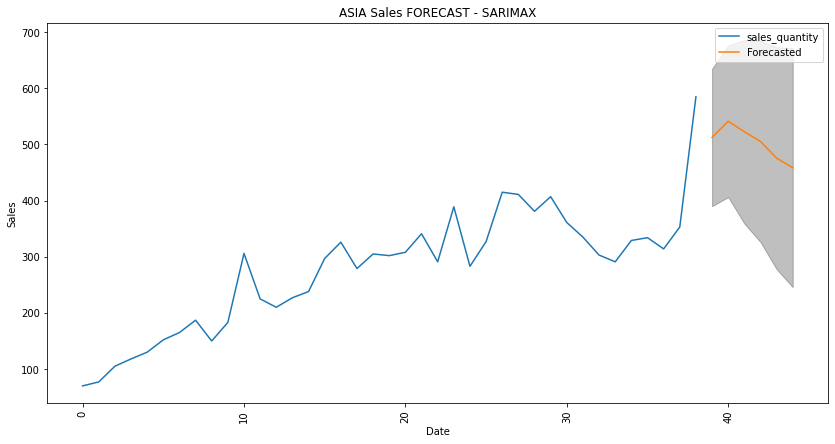

<Figure size 1152x576 with 0 Axes>

In [27]:
#####FORECAST OF NEXT 6 Months ASIA Sales (steps=6)
ASIA_pred_uc = ASIA_SARIMAX_results.get_forecast(steps=6)
ASIA_pred_ci = ASIA_pred_uc.conf_int()
ax = asia_sales.plot(title='ASIA Sales FORECAST - SARIMAX', label='Observed', figsize=(14, 7))
ASIA_pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(ASIA_pred_ci.index,
                ASIA_pred_ci.iloc[:, 0],
                ASIA_pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.xticks(rotation=90)
plt.show()
#saving the prediction as a png file
plt.savefig('ASIA_FORECAST_SARIMAX.png')

In [28]:
#####CONSOLIDATING ALL THE PREDICTIONS AND THE PREDICTION INTERVALS
print('EMEA PREDICTION AND EMEA PREDICTION INTERVALS IN ABS')

EMEA_CI = EMEA_pred_uc.conf_int(alpha=0.05)
EMEA_PRED = EMEA_pred_uc.predicted_mean
EMEA_Full_Prediction = pd.concat([EMEA_PRED, EMEA_CI], axis=1, join='inner')
print(EMEA_Full_Prediction)

print('AMERICA PREDICTION AND AMERICA PREDICTION INTERVALS IN ABS')

AMERICA_CI = AMERICA_pred_uc.conf_int(alpha=0.05)
AMERICA_PRED = AMERICA_pred_uc.predicted_mean
AMERICA_Full_Prediction = pd.concat([AMERICA_PRED, AMERICA_CI], axis=1, join='inner')
print(AMERICA_Full_Prediction)

print('ASIA PREDICTION AND ASIA PREDICTION INTERVALS IN ABS')

ASIA_CI = ASIA_pred_uc.conf_int(alpha=0.05)
ASIA_PRED = ASIA_pred_uc.predicted_mean
ASIA_Full_Prediction = pd.concat([ASIA_PRED, ASIA_CI], axis=1, join='inner')
print(ASIA_Full_Prediction)


EMEA PREDICTION AND EMEA PREDICTION INTERVALS IN ABS
    predicted_mean  lower sales_quantity  upper sales_quantity
39     2632.217146           2251.538628           3012.895664
40     2858.660986           2356.992179           3360.329794
41     2915.356528           2312.462900           3518.250155
42     2898.255327           2209.367376           3587.143279
43     2189.423955           1424.077732           2954.770178
44     2289.117653           1454.295177           3123.940129
AMERICA PREDICTION AND AMERICA PREDICTION INTERVALS IN ABS
    predicted_mean  lower sales_quantity  upper sales_quantity
39     9096.381390           7611.817192          10580.945588
40     8126.343042           5914.914051          10337.772032
41    10420.758669           7658.528132          13182.989207
42    10291.098837           7070.078432          13512.119242
43    10122.237307           6499.999461          13744.475153
44    12016.910188           8033.657493          16000.162883
ASIA P

In [29]:
#####GETTING ONLY THE PREDICTED VALUES - STORING THEM INTO A DATAFRAME FOR THE JOIN WITH THE ACTUALS
EMEA_Testing = pd.DataFrame(EMEA_pred.predicted_mean)
print(EMEA_Testing)

AMERICA_Testing = pd.DataFrame(AMERICA_pred.predicted_mean)
print(AMERICA_Testing)

ASIA_Testing = pd.DataFrame(ASIA_pred.predicted_mean)
print(ASIA_Testing)

    predicted_mean
26     1580.779240
27     1711.574132
28     2130.878462
29     2254.116593
30     2170.549917
31     1943.450458
32     1444.935186
33     1640.681499
34     1393.965786
35     1622.981085
36     1799.260429
37     1808.321948
38     2202.212641
    predicted_mean
26     4636.193648
27     6051.233187
28     6969.874168
29     5751.724979
30     8152.050243
31     7322.358128
32     8058.602383
33     9314.197300
34     7471.336535
35     5329.812258
36     4794.393175
37     4698.284603
38     6389.030583
    predicted_mean
26      326.402915
27      424.821838
28      463.868879
29      378.932148
30      399.755058
31      400.250947
32      346.309345
33      350.965041
34      304.244487
35      360.721211
36      275.788557
37      318.433395
38      423.507035


In [30]:
#####EMEA FINAL DATAFRAME

EMEA_Actuals = emea_sales_actuals.reset_index()

print('EMEA FINAL TABLE BACKTESTING')

EMEA_final = pd.concat([EMEA_Actuals, EMEA_Testing], axis=1, join="outer")
EMEA_final = EMEA_final.rename(columns={"sales_quantity": "sales_actuals", "predicted_mean": "sales_forecasted"})

#Calculating the error
EMEA_final['error'] = EMEA_final['sales_forecasted'] - EMEA_final['sales_actuals']
#Calculating  the abs error
EMEA_final['abs_error'] = (EMEA_final['sales_forecasted'] - EMEA_final['sales_actuals']).abs()
#Calculating the squared error
EMEA_final['squared_error'] = (EMEA_final['sales_forecasted'] - EMEA_final['sales_actuals']).pow(2)
#Calculating the percentage error
EMEA_final['perc_error'] = ((EMEA_final['error']/EMEA_final['sales_actuals'])*100)
#Calculating the abs percentage error
EMEA_final['abs_perc_error'] = ((EMEA_final['error']/EMEA_final['sales_actuals'])*100).abs()

print(EMEA_final)

#print EMEA mean squared error
EMEA_mse = EMEA_final['squared_error'].sum()/EMEA_final['squared_error'].count()
print('EMEA MSE: {} '.format(EMEA_mse))

#print EMEA root mean squared error
EMEA_rmse = np.sqrt(EMEA_mse.astype(np.float64))
print('EMEA RMSE: {} '.format(EMEA_rmse))

#print EMEA mean absolute error
EMEA_mae = EMEA_final['abs_error'].sum()/EMEA_final['abs_error'].count()
print('EMEA MAE: {} '.format(EMEA_mae))

#print EMEA mean absolute percentage error
EMEA_mape = EMEA_final['abs_perc_error'].sum()/EMEA_final['abs_perc_error'].count()
print('EMEA MAPE: {} '.format(EMEA_mape))

EMEA FINAL TABLE BACKTESTING
         month region  sales_actuals  sales_forecasted       error  \
0   01-01-2018   EMEA            257               NaN         NaN   
1   01-02-2018   EMEA            309               NaN         NaN   
2   01-03-2018   EMEA            396               NaN         NaN   
3   01-04-2018   EMEA            460               NaN         NaN   
4   01-05-2018   EMEA            462               NaN         NaN   
5   01-06-2018   EMEA            644               NaN         NaN   
6   01-07-2018   EMEA            792               NaN         NaN   
7   01-08-2018   EMEA            633               NaN         NaN   
8   01-09-2018   EMEA            591               NaN         NaN   
9   01-10-2018   EMEA            561               NaN         NaN   
10  01-11-2018   EMEA            543               NaN         NaN   
11  01-12-2018   EMEA            449               NaN         NaN   
12  01-01-2019   EMEA            577               NaN       

In [31]:
#####AMERICA FINAL DATAFRAME

AMERICA_Actuals = america_sales_actuals.reset_index()

print('AMERICA FINAL TABLE BACKTESTING')

AMERICA_final = pd.concat([AMERICA_Actuals, AMERICA_Testing], axis=1, join="outer")
#NAM_final = NAM_final.drop(['month'], axis =1)
AMERICA_final = AMERICA_final.rename(columns={"sales_quantity": "sales_actuals", "predicted_mean": "sales_forecasted"})

#Calculating the error
AMERICA_final['error'] = AMERICA_final['sales_forecasted'] - AMERICA_final['sales_actuals']
#Calculating  the abs error
AMERICA_final['abs_error'] = (AMERICA_final['sales_forecasted'] - AMERICA_final['sales_actuals']).abs()
#Calculating the squared error
AMERICA_final['squared_error'] = (AMERICA_final['sales_forecasted'] - AMERICA_final['sales_actuals']).pow(2)
#Calculating the percentage error
AMERICA_final['perc_error'] = ((AMERICA_final['error']/AMERICA_final['sales_actuals'])*100)
#Calculating the abs percentage error
AMERICA_final['abs_perc_error'] = ((AMERICA_final['error']/AMERICA_final['sales_actuals'])*100).abs()

print(AMERICA_final)

#print mean squared error
AMERICA_mse = AMERICA_final['squared_error'].sum()/AMERICA_final['squared_error'].count()
print('AMERICA MSE: {} '.format(AMERICA_mse))
#print root mean squared error
AMERICA_rmse = np.sqrt(AMERICA_mse.astype(np.float64))
print('AMERICA RMSE: {} '.format(AMERICA_rmse))
#print mean absolute error
AMERICA_mae = AMERICA_final['abs_error'].sum()/AMERICA_final['abs_error'].count()
print('AMERICA MAE: {} '.format(AMERICA_mae))
#print mean absolute percentage error
AMERICA_mape = AMERICA_final['abs_perc_error'].sum()/AMERICA_final['abs_perc_error'].count()
print('AMERICA MAPE: {} '.format(AMERICA_mape))

AMERICA FINAL TABLE BACKTESTING
         month   region  sales_actuals  sales_forecasted        error  \
0   01-01-2018  AMERICA            644               NaN          NaN   
1   01-02-2018  AMERICA            962               NaN          NaN   
2   01-03-2018  AMERICA           1435               NaN          NaN   
3   01-04-2018  AMERICA           1909               NaN          NaN   
4   01-05-2018  AMERICA           2042               NaN          NaN   
5   01-06-2018  AMERICA           1792               NaN          NaN   
6   01-07-2018  AMERICA           1839               NaN          NaN   
7   01-08-2018  AMERICA           2051               NaN          NaN   
8   01-09-2018  AMERICA           1916               NaN          NaN   
9   01-10-2018  AMERICA           2107               NaN          NaN   
10  01-11-2018  AMERICA           1501               NaN          NaN   
11  01-12-2018  AMERICA            961               NaN          NaN   
12  01-01-2019  AME

In [32]:
#####ASIA FINAL DATAFRAME


ASIA_Actuals = asia_sales_actuals.reset_index()
print('ASIA FINAL TABLE BACKTESTING')

ASIA_final = pd.concat([ASIA_Actuals, ASIA_Testing], axis=1, join="outer")
#OPST_final = OPST_final.drop(['month'], axis =1)
ASIA_final = ASIA_final.rename(columns={"sales_quantity": "sales_actuals", "predicted_mean": "sales_forecasted"})

#Calculating the error
ASIA_final['error'] = ASIA_final['sales_forecasted'] - ASIA_final['sales_actuals']
#Calculating  the abs error
ASIA_final['abs_error'] = (ASIA_final['sales_forecasted'] - ASIA_final['sales_actuals']).abs()
#Calculating the squared error
ASIA_final['squared_error'] = (ASIA_final['sales_forecasted'] - ASIA_final['sales_actuals']).pow(2)
#Calculating the percentage error
ASIA_final['perc_error'] = ((ASIA_final['error']/ASIA_final['sales_actuals'])*100)
#Calculating the abs percentage error
ASIA_final['abs_perc_error'] = ((ASIA_final['error']/ASIA_final['sales_actuals'])*100).abs()

print(ASIA_final)

#print mean squared error
ASIA_mse = ASIA_final['squared_error'].sum()/ASIA_final['squared_error'].count()
print('ASIA MSE: {} '.format(ASIA_mse))
#print root mean squared error
ASIA_rmse = np.sqrt(ASIA_mse.astype(np.float64))
print('ASIA RMSE: {} '.format(ASIA_rmse))
#print mean absolute error
ASIA_mae = ASIA_final['abs_error'].sum()/ASIA_final['abs_error'].count()
print('ASIA MAE: {} '.format(ASIA_mae))
#print mean absolute percentage error
ASIA_mape = ASIA_final['abs_perc_error'].sum()/ASIA_final['abs_perc_error'].count()
print('ASIA MAPE: {} '.format(ASIA_mape))


ASIA FINAL TABLE BACKTESTING
         month region  sales_actuals  sales_forecasted       error  \
0   01-01-2018   ASIA             70               NaN         NaN   
1   01-02-2018   ASIA             77               NaN         NaN   
2   01-03-2018   ASIA            105               NaN         NaN   
3   01-04-2018   ASIA            118               NaN         NaN   
4   01-05-2018   ASIA            130               NaN         NaN   
5   01-06-2018   ASIA            152               NaN         NaN   
6   01-07-2018   ASIA            165               NaN         NaN   
7   01-08-2018   ASIA            187               NaN         NaN   
8   01-09-2018   ASIA            150               NaN         NaN   
9   01-10-2018   ASIA            183               NaN         NaN   
10  01-11-2018   ASIA            306               NaN         NaN   
11  01-12-2018   ASIA            225               NaN         NaN   
12  01-01-2019   ASIA            210               NaN       

In [19]:
#####STORE ALL THE FINAL TABLES FOR ALL THE REGIONS INTO A SINGLE EXCEL FILE

EMEA_final_Tb = pd.DataFrame(EMEA_final)
AMERICA_final_Tb = pd.DataFrame(AMERICA_final)
ASIA_final_Tb = pd.DataFrame(ASIA_final)

path = 'STARTS_sarima_all_orgs.xlsx'
with pd.ExcelWriter(path, engine='openpyxl') as writer:
    EMEA_final_Tb.to_excel(writer, 'EMEA_final_Sales_Forecast')
    AMERICA_final_Tb.to_excel(writer, 'AMERICA_final_Sales_Forecats')
    AMERICA_final_Tb.to_excel(writer, 'ASIA_final_Sales_Forecast')